In [1]:
import numpy as np
from scipy import signal
from PIL import Image

In [3]:
def load_image(path):
    return np.asarray(Image.open(path))/255.0

def save(path, img):
    tmp = np.asarray(img*255.0, dtype=np.uint8)
    Image.fromarray(tmp).save(path)

def denoise_image(inp):
    # estimate 'background' color by a median filter
    bg = signal.medfilt2d(inp, 11)
    save('background.png', bg)

    # compute 'foreground' mask as anything that is significantly darker than
    # the background
    mask = inp < bg - 0.1
    save('foreground_mask.png', mask)

    # return the input value for all pixels in the mask or pure white otherwise
    return np.where(mask, inp, 1.0)

In [7]:
!ls

Autoencoder-noisydata.ipynb    NoisyData-EDA.ipynb
Background-removal.ipynb       dataset
CS-GY_6643--final_proposal.pdf sampleSubmission.csv
CV-architecture.png


In [8]:
inp_path = 'dataset/train/2.png'
out_path = 'output.png'

inp = load_image(inp_path)
out = denoise_image(inp)

save(out_path, out)

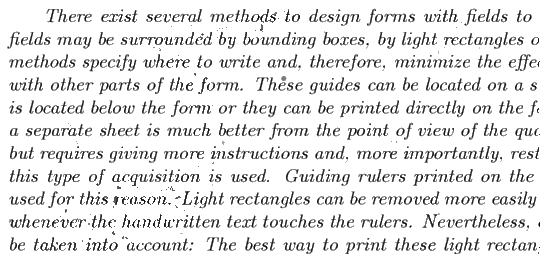

In [9]:
Image.open(out_path)